In [26]:
import json
import pandas as pd
import numpy as np
import requests
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.font_manager as mfm
mpl.rcParams['figure.figsize'] =(8,5)
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')
mpl.rcParams['font.sans-serif'] = ['simhei'] 

## Request Data

First of all, we need to extract the data from the Hong Kong Goverment. There is a json file about the topic I am concerned available. 

In [3]:
raw = requests.get('https://www.housingauthority.gov.hk/datagovhk/prh-estates.json')
data = raw.json()

Using the following codes, we are able to check the similar keys of all dictionaries, which will be the name of the columns that we will use to construct the dataframe later.

In [4]:
data[40]

{'Carpark Management': {'en': 'Creative Property Services Consultants Ltd.<br>G/F, Tsui Luk House, Tsui Lok Estate, Chai Wan<br>Telephone: 2505 1454<br>Fax: 2505 1324<br>Web Site: www.creativepsc.com.hk',
  'zh-Hans': '创毅物业服务顾问有限公司\n柴湾翠乐邨翠禄楼地下\n电话：2505 1454\n传真：2505 1324\n网站：www.creativepsc.com.hk',
  'zh-Hant': '創毅物業服務顧問有限公司\n柴灣翠樂邨翠祿樓地下\n電話：2505 1454\n傳真：2505 1324\n網站：www.creativepsc.com.hk'},
 'District Name': {'en': 'Eastern', 'zh-Hans': '东区', 'zh-Hant': '東區'},
 'District Tenancy Management Office/Estate Office': {'en': 'Wan Tsui Estate Office <br>G/F, Wai Tsui House, <br>Wan Tsui Estate, <br>3 Tsui King Street,<br>Chai Wan, Hong Kong.<br>Tel : 2558 0180<br>Fax : 2505 2147<br>',
  'zh-Hans': '环翠邨辧事处 \n柴湾翠景街3号\n环翠邨蕙翠楼地下 \n电话 : 2558 0180\n传真 : 2505 2147\n',
  'zh-Hant': '環翠邨辧事處 \n柴灣翠景街3號\n環翠邨蕙翠樓地下 \n電話 : 2558 0180\n傳真 : 2505 2147\n'},
 'Estate Management Advisory Committee (EMAC)': {'en': 'Not Yet Formed',
  'zh-Hans': '未成立',
  'zh-Hant': '未成立'},
 'Estate Name': {'en': 'Tsui Lok Estat

The info(item) function serves a method to extract the values of chosen keys. 

In [5]:
def extract_info(data):
    Estate = data['Estate Name']['zh-Hant']  
    District = data['District Name']['zh-Hant']  
    Region = data['Region Name']['zh-Hant']  
    Type_of_estate = data['Type of Estate']['zh-Hant']  
    Year_of_intake = data['Year of Intake']['zh-Hant']  
    No_of_blocks = data['No. of Blocks']   
    No_of_rental_flats = data['No. of Rental Flats']['zh-Hant']
    Flat_size_m2 = data['Flat Size (m2)']['zh-Hant']  
    Property_management = data['Property Management']['zh-Hant']  
    Carpark_management = data['Carpark Management']['zh-Hant'] 
    
    return(Estate, District, Property_management, Carpark_management, Type_of_estate, No_of_blocks, No_of_rental_flats, Flat_size_m2)

In [7]:
info_dict = []
i = 
for data[i] in data:
    feature = {}
    feature['Estate'], feature['District'], feature['Property_management'], feature['Carpark_management'], feature['Type_of_estate'], feature['No_of_blocks'], feature['No_of_rental_flats'],feature['Flat_size_m2'] = extract_info(data[i]) 
    info_dict.append(feature)

In [445]:
pd.DataFrame(info_dict).to_csv('housing_info.csv')

In [8]:
df = pd.DataFrame(pd.read_csv('housing_info.csv', encoding='utf-8'))

In [9]:
df

,Unnamed: 0,Carpark_management,District,Estate,Flat_size_m2,No_of_blocks,No_of_rental_flats,Property_management,Type_of_estate
0,0,卓安物業顧問有限公司\n九龍城德朗邨停車場地下\n電話：2856 6225\n傳真：2856...,九龍城,德朗邨,14 – 37,9,8 200 截至2018年9月30日的情況,卓安物業顧問有限公司\n九龍城德朗邨停車場地下\n電話：2856 6225\n傳真：2856...,租住屋邨
1,1,卓安物業顧問有限公司\n九龍啟晴邨康晴樓一樓\n電話: 2426 9011 \n傳真: 24...,九龍城,啟晴邨,14.05-37.58,6,5 200 截至2018年9月30日的情況,卓安物業顧問有限公司\n九龍啟晴邨康晴樓一樓\n電話: 2426 9011 \n傳真: 24...,租住屋邨
2,2,建盈停車場有限公司\n電話：2815 6209\n傳真：2815 6939\n電郵： pet...,觀塘,彩福邨,21.2 - 43.6,4,3 400 截至2018年9月30日的情況,翔俊有限公司\n彩福邨彩善樓地下\n電話：2750 3811\n傳真：3197 0313\n...,租住屋邨
3,3,越秀亞通停車場有限公司\n北角蜆殼街9-23號\n秀明中心28樓\n電話: 2512 961...,北區,清河邨,17.9 – 39.8,8,7 200 截至2018年9月30日的情況,創毅物業服務顧問有限公司 \n上水清河邨清譽樓地下\n電話：2671 7939\n傳真：26...,租住屋邨
4,4,創毅物業服務顧問有限公司\n顯耀邨顯耀樓地下\n電話: 2278 4000\n傳真: 227...,沙田,顯耀邨,17.81 - 39.74,1,800 截至2018年9月30日的情況,創毅物業服務顧問有限公司\n顯耀邨顯耀樓地下\n電話: 2278 4000\n傳真: 227...,租住屋邨
5,5,越秀亞通停車場有限公司\n北角蜆殼街9-23號\n秀明中心28樓\n電話: 2512 961...,沙田,美田邨,14.05 - 40.15,8,6 700 截至2018年9月30日的情況,創毅物業服務顧問有限公司\n沙田美田邨美致樓地下\n電話：2693 0705\n傳真：269...,租住屋邨
6,6,威信(香港)停車場管理有限公司\n新界葵涌興芳路新都會廣場第一座2901室\n電話：2487...,葵青,長青邨,23.1 - 54.9,8,4 900 截至2018年9月30日的情況,宜居顧問服務有限公司\n青衣長青邨青槐樓地下20-29號\n電話：2495 2224\n傳真...,租住屋邨
7,7,威信(香港)停車場管理有限公司\n新界葵涌興芳路新都會廣場第一座2901室\n電話：2487...,黃大仙,富山邨,15.1 - 32.2,3,1 600 截至2018年9月30日的情況,領先管理有限公司\n富山邨富仁樓地下\n電話：2351 2115\n(24小時電話：2327...,租住屋邨
8,8,領先管理有限公司\n深水埗大坑東邨東旺樓地下\n電話：2788 0078\n傳真：2788 ...,深水埗,大坑東邨,17.7 - 50.1,9,2 100 截至2018年9月30日的情況,領先管理有限公司\n深水埗大坑東邨東旺樓地下\n電話：2788 0078\n傳真：2788 ...,租住屋邨
9,9,建盈停車場有限公司\n九龍牛頭角彩德商場地下\n電話：2806 3290,觀塘,彩德邨,14.05 - 43.6,8,5 800 截至2018年9月30日的情況,翔俊有限公司\n九龍牛頭角彩德邨彩俊樓地下\n電話：2756 9990\n傳真：2750 7...,租住屋邨


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 9 columns):
Unnamed: 0             226 non-null int64
Carpark_management     225 non-null object
District               226 non-null object
Estate                 226 non-null object
Flat_size_m2           226 non-null object
No_of_blocks           226 non-null int64
No_of_rental_flats     226 non-null object
Property_management    226 non-null object
Type_of_estate         226 non-null object
dtypes: int64(2), object(7)
memory usage: 16.0+ KB


In [11]:
pm_company = [df['Property_management'][i].split('\n', 5)[0:] for i in range(len(df['Property_management']))]

In [12]:
pm_com_dict = []
special = []
for item in pm_company:
    if '辦事處' in item[0]:
        pm_com_dict.append('政府')
    elif '公司' in item[0]:
        pm_com_dict.append(item[0])
    elif '由業主立案法團委派' in item[0]:
        pm_com_dict.append(item[0])
    elif '-' in item[0]:
        pm_com_dict.append(item[0])
    elif '管理處' in item[0]:
        pm_com_dict.append('政府')
    else:
        if '石硤尾邨第一期)' in item[1:]:
            pm_com_dict.append('領先管理有限公司')
        else:
            pm_com_dict.append(item[1:2])
            special.append(item[1:])

In [13]:
pm_com_dict = pd.Series(pm_com_dict)

In [14]:
pm_com_dict

0           卓安物業顧問有限公司
1           卓安物業顧問有限公司
2               翔俊有限公司
3        創毅物業服務顧問有限公司 
4         創毅物業服務顧問有限公司
5         創毅物業服務顧問有限公司
6           宜居顧問服務有限公司
7             領先管理有限公司
8             領先管理有限公司
9               翔俊有限公司
10        創毅物業服務顧問有限公司
11      [梨木樹(二)邨屋邨辦事處]
12        創毅物業服務顧問有限公司
13          卓安物業顧問有限公司
14          卓安物業顧問有限公司
15                  政府
16        創毅物業服務顧問有限公司
17          高耀物業管理有限公司
18         卓安物業顧問有限公司 
19         卓安物業顧問有限公司 
20         卓安物業顧問有限公司 
21           由業主立案法團委派
22       新恆基國際物業管理有限公司
23      中國海外物業服務有限公司  
24          宜居顧問服務有限公司
25           由業主立案法團委派
26          宜居物業管理有限公司
27                  政府
28                  []
29                  政府
            ...       
196           領先管理有限公司
197          由業主立案法團委派
198                 政府
199           領先管理有限公司
200         雅居物業管理有限公司
201                 政府
202       創毅物業服務顧問有限公司
203         卓安物業顧問有限公司
204                 政府
205             翔俊有限公司
206                  -
207                 政府
208        

In [15]:
pm_com_dict.loc[pm_com_dict.str.len() == 0] = 'NA'

In [16]:
pm_com_dict.loc[pm_com_dict.apply(lambda x: type(x)==list)]

11             [梨木樹(二)邨屋邨辦事處]
61                         []
63             [創毅物業服務顧問有限公司]
109               [葵涌邨辦事處(一)]
176    [創毅物業服務顧問有限公司 (只限德欣樓)]
208                [水泉澳邨辦事處 ]
dtype: object

In [17]:
pm_com_dict.loc[[11,109,208]] = '政府'
pm_com_dict.loc[61] = 'NA'
pm_com_dict.loc[[63,176]] = '創毅物業服務顧問有限公司'

In [18]:
pm_com_dict.loc[pm_com_dict.str.contains('創毅')] = '創毅物業服務顧問有限公司'
pm_com_dict.loc[pm_com_dict.str.contains('業主')] = '由業主立案法團委派'
pm_com_dict.loc[pm_com_dict.str.contains('卓安')] = '卓安物業顧問有限公司'
pm_com_dict.loc[pm_com_dict.str.contains('高耀')] = '高耀物業管理有限公司'
pm_com_dict.loc[pm_com_dict.str.contains('雅居')] = '雅居物業管理有限公司'
pm_com_dict.loc[pm_com_dict.str.contains('佳富')] = '佳富物業服務有限公司'
pm_com_dict.loc[pm_com_dict.str.contains('中國海外')] = '中國海外物業服務有限公司'
pm_com_dict.loc[pm_com_dict.str.contains('宜居')]  = '宜居顧問服務有限公司'
pm_com_dict.loc[pm_com_dict.str.contains('領先')] = '領先管理有限公司'
pm_com_dict.loc[pm_com_dict.str.contains('新恒基')] = '新恒基國際物業管理有限公司'
pm_com_dict.loc[pm_com_dict.str.contains('新恆基')] = '新恒基國際物業管理有限公司'
pm_com_dict.loc[pm_com_dict.str.contains('嘉怡')] = '嘉怡物業管理有限公司'
pm_com_dict.loc[pm_com_dict.str.contains('-')] = 'NA'

In [19]:
pm_df = pd.DataFrame(pm_com_dict.value_counts())
pm_df.reset_index(inplace=True)
pm_df.columns = ['機構','數量']

In [20]:
pm_df

,機構,數量
0,政府,61
1,創毅物業服務顧問有限公司,23
2,由業主立案法團委派,23
3,雅居物業管理有限公司,20
4,卓安物業顧問有限公司,18
5,宜居顧問服務有限公司,16
6,領先管理有限公司,13
7,NA,12
8,嘉怡物業管理有限公司,11
9,中國海外物業服務有限公司,9


Text(0.5,1,'香港公屋物業管理公司')

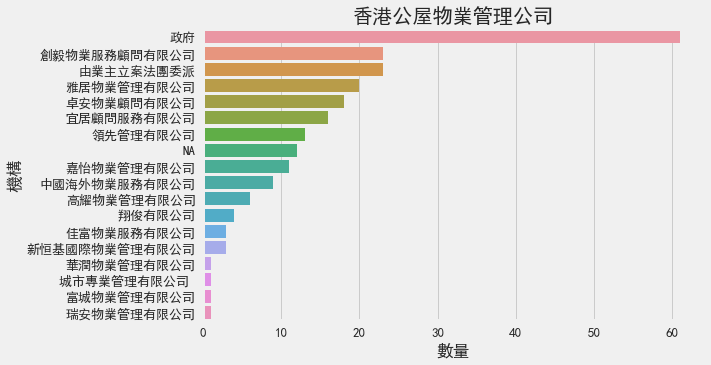

In [28]:
sns.barplot(x='數量', y='機構', data=pm_df)
plt.title('香港公屋物業管理公司')